In [ ]:
#pip install pycaret

In [ ]:
#pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import SMOTENC
#from sklearn.model_selection import train_test_split
from pycaret.classification import *
import shap
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
#Load Data
df = pd.read_csv('term-deposit-marketing-2020-cleaned.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        39765 non-null  object
 2   marital    40000 non-null  object
 3   education  38469 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    27235 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
#Let's fill in missing data for contact
df = df.replace(np.nan,'unknown')

In [ ]:
#use pycaret to get baseline models
# setup the dataset
grid = setup(data=df, target=df.columns[-1], session_id = 42)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9390,0.9505,0.4240,0.6141,0.5006,0.4693,0.4790,0.384
gbc,Gradient Boosting Classifier,0.9374,0.9445,0.3612,0.6142,0.4536,0.4229,0.4403,3.456
rf,Random Forest Classifier,0.9362,0.9388,0.3019,0.6206,0.4052,0.3758,0.4037,2.543
lr,Logistic Regression,0.9339,0.9215,0.2569,0.5989,0.3587,0.3298,0.3633,3.372
et,Extra Trees Classifier,0.9329,0.9259,0.2352,0.5893,0.3350,0.3067,0.3434,2.357
lda,Linear Discriminant Analysis,0.9327,0.9285,0.4279,0.5451,0.4786,0.4433,0.4474,0.202
ridge,Ridge Classifier,0.9317,0.0000,0.1428,0.6223,0.2320,0.2108,0.2756,0.048
ada,Ada Boost Classifier,0.9305,0.9279,0.3049,0.5324,0.3863,0.3526,0.3686,0.969
knn,K Neighbors Classifier,0.9246,0.7674,0.2347,0.4578,0.3098,0.2744,0.2918,0.405
dt,Decision Tree Classifier,0.9185,0.6984,0.4412,0.4379,0.4391,0.3952,0.3955,0.195


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
#Accuracy is quite high however recal isn't great
#In this application, recal can be argue to be a better metric
#This dataset is highly imbalance so that try to fix that
#try again with smote enabled
# setup the dataset
grid = setup(data=df, target=df.columns[-1], session_id = 42, fix_imbalance=True)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9386,0.9503,0.4571,0.6002,0.5179,0.4859,0.4916,1.133
rf,Random Forest Classifier,0.9346,0.9373,0.3049,0.5968,0.4023,0.3715,0.3958,5.630
et,Extra Trees Classifier,0.9327,0.9279,0.2979,0.5669,0.3898,0.3579,0.3791,5.109
gbc,Gradient Boosting Classifier,0.9324,0.9405,0.5001,0.5355,0.5166,0.4804,0.4810,12.742
ada,Ada Boost Classifier,0.9205,0.9174,0.4160,0.4469,0.4304,0.3878,0.3883,2.921
dt,Decision Tree Classifier,0.9150,0.7009,0.4506,0.4186,0.4335,0.3877,0.3882,0.598
ridge,Ridge Classifier,0.8754,0.0000,0.8148,0.3467,0.4862,0.4282,0.4792,0.115
lda,Linear Discriminant Analysis,0.8754,0.9225,0.8148,0.3467,0.4863,0.4283,0.4792,0.427
lr,Logistic Regression,0.8642,0.9266,0.8459,0.3298,0.4743,0.4132,0.4741,6.034
knn,K Neighbors Classifier,0.8073,0.7717,0.6388,0.2172,0.3242,0.2424,0.2907,0.637


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
#the best model in terms of accuracry is light gradient boosting machine
#however, it's recall score is not great
lightgbm = create_model('lightgbm')
lightgbm_tuned = tune_model(lightgbm,fold = 5,optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8605,0.8919,0.7852,0.3142,0.4488,0.3853,0.4386
1,0.8571,0.8849,0.7457,0.3023,0.4302,0.3648,0.4137
2,0.8741,0.8856,0.7309,0.3318,0.4564,0.3964,0.4361
3,0.8716,0.9069,0.8296,0.3408,0.4831,0.4241,0.4791
4,0.8705,0.8950,0.7797,0.3312,0.4649,0.4046,0.4529
Mean,0.8668,0.8929,0.7742,0.3241,0.4567,0.3951,0.4441
SD,0.0067,0.0080,0.0344,0.0139,0.0175,0.0197,0.0215


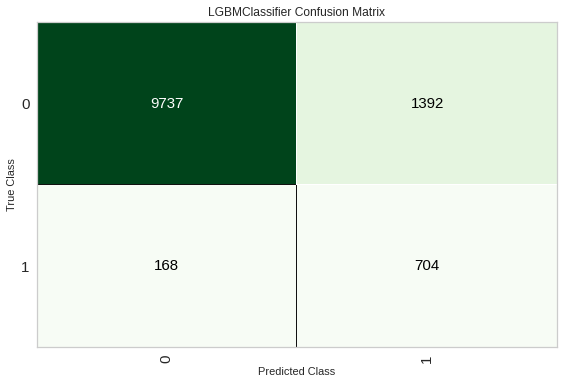

In [ ]:
plot_model(lightgbm_tuned, plot = 'confusion_matrix')

In [ ]:
#As mentioned above, even though client is looking for a model with high accuracry
#It's sensible to pick a model that also has good recall score
ridge = create_model('ridge')
ridge_tuned = tune_model(ridge,fold = 5,optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8727,0.0,0.8296,0.3429,0.4852,0.4265,0.4810
1,0.8686,0.0,0.8198,0.3337,0.4743,0.4141,0.4690
2,0.8741,0.0,0.8000,0.3418,0.4789,0.4202,0.4696
3,0.8775,0.0,0.7951,0.3481,0.4842,0.4265,0.4736
4,0.8819,0.0,0.8218,0.3605,0.5011,0.4455,0.4944
Mean,0.8750,0.0,0.8132,0.3454,0.4848,0.4266,0.4775
SD,0.0045,0.0,0.0133,0.0089,0.0091,0.0105,0.0095


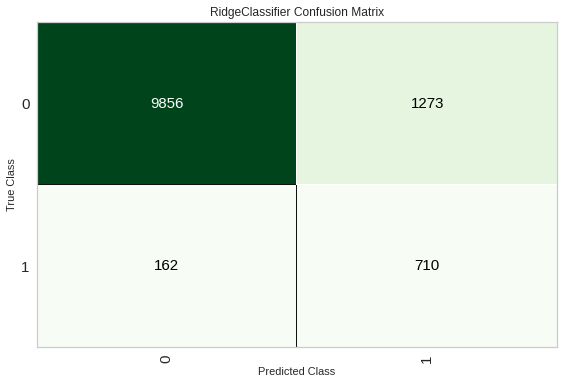

In [ ]:
#take a look at the confusion matrix
plot_model(ridge_tuned, plot = 'confusion_matrix')

In [ ]:
#The confusion matrix shows that this model weakness is false positive
#Let's see if we can improve this by stacking models

# create another model for stacking
lda = create_model('lda')
lda_tuned = tune_model(lda, fold=5,optimize = 'Recall')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8729,0.9260,0.8272,0.3429,0.4848,0.4261,0.4802
1,0.8679,0.9167,0.8148,0.3317,0.4714,0.4109,0.4654
2,0.8734,0.9150,0.7951,0.3397,0.4760,0.4169,0.4659
3,0.8775,0.9202,0.7901,0.3474,0.4827,0.4249,0.4713
4,0.8828,0.9313,0.8243,0.3627,0.5038,0.4485,0.4973
Mean,0.8749,0.9218,0.8103,0.3449,0.4837,0.4255,0.4760
SD,0.0050,0.0061,0.0151,0.0103,0.0111,0.0128,0.0119


In [ ]:
#stacking models
stacker = stack_models(estimator_list = [ridge_tuned,lda_tuned,lightgbm_tuned],fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8796,0.9271,0.8346,0.3577,0.5007,0.4445,0.4964
1,0.8775,0.9178,0.8025,0.3491,0.4865,0.4290,0.4771
2,0.8888,0.9177,0.7728,0.3709,0.5012,0.4472,0.4855
3,0.8932,0.9310,0.8025,0.3855,0.5208,0.4689,0.5090
4,0.8848,0.9287,0.7970,0.3638,0.4996,0.4446,0.4884
Mean,0.8848,0.9245,0.8019,0.3654,0.5018,0.4468,0.4913
SD,0.0058,0.0056,0.0197,0.0124,0.0110,0.0128,0.0108


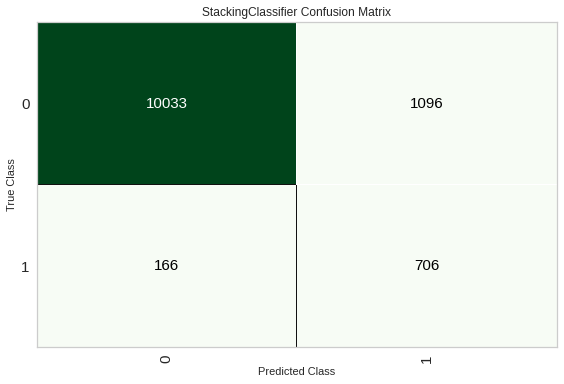

In [ ]:
plot_model(stacker, plot = 'confusion_matrix')

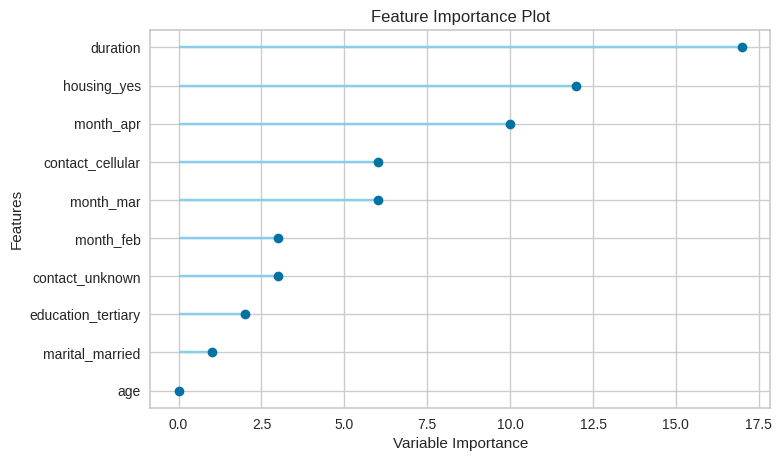

In [ ]:
#Let's look at lightbgm model's feature important
plot_model(lightgbm_tuned, plot='feature')

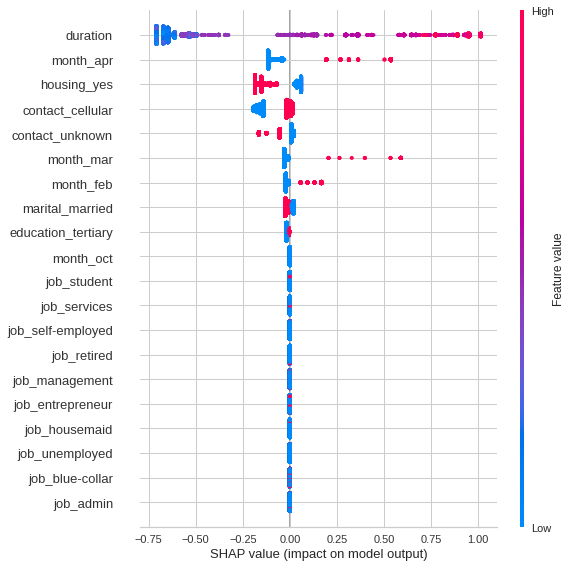

In [ ]:
interpret_model(lightgbm_tuned)

In [ ]:
interpret_model(lightgbm_tuned, plot = 'reason', observation = 10)

In [ ]:
#important feature is overwhelmingly the duration and the time of the month
#Interestingly, even though the rate of success for the month of October is high as seen in EDA,
#this does not make a great impact
#There is still a question of whether this time depedent features in a natural part of the system
#or if the higher rate is a result of a campaige.
# setup the dataset
grid = setup(data=df, target=df.columns[-1], session_id = 42, fix_imbalance=True,
             feature_selection = True, feature_selection_threshold = 0.75)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9380,0.9502,0.4561,0.5926,0.5144,0.4819,0.4872,1.131
rf,Random Forest Classifier,0.9350,0.9379,0.2969,0.6042,0.3970,0.3669,0.3935,5.318
et,Extra Trees Classifier,0.9330,0.9297,0.2855,0.5741,0.3805,0.3494,0.3738,5.039
gbc,Gradient Boosting Classifier,0.9316,0.9404,0.4986,0.5292,0.5129,0.4762,0.4767,12.612
ada,Ada Boost Classifier,0.9205,0.9172,0.4170,0.4469,0.4309,0.3883,0.3889,2.925
dt,Decision Tree Classifier,0.9149,0.7002,0.4491,0.4189,0.4328,0.3870,0.3876,0.577
ridge,Ridge Classifier,0.8751,0.0000,0.8152,0.3461,0.4857,0.4276,0.4789,0.110
lda,Linear Discriminant Analysis,0.8751,0.9227,0.8148,0.3460,0.4855,0.4274,0.4786,0.380
lr,Logistic Regression,0.8639,0.9268,0.8508,0.3297,0.4750,0.4140,0.4759,7.581
knn,K Neighbors Classifier,0.8075,0.7718,0.6388,0.2174,0.3243,0.2426,0.2909,0.569


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# setup the dataset
grid = setup(data=df, target=df.columns[-1], session_id = 42, fix_imbalance=True,
             feature_ratio = True, feature_interaction = True)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9376,0.9488,0.4916,0.5814,0.5322,0.4991,0.5014,2.062
et,Extra Trees Classifier,0.9335,0.9403,0.4709,0.5473,0.5052,0.4698,0.4719,7.044
rf,Random Forest Classifier,0.9333,0.9427,0.5069,0.5417,0.5231,0.4873,0.4880,14.125
gbc,Gradient Boosting Classifier,0.9277,0.9395,0.5870,0.5008,0.5402,0.5013,0.5033,36.617
ada,Ada Boost Classifier,0.9189,0.9229,0.5233,0.4490,0.4829,0.4392,0.4409,7.372
dt,Decision Tree Classifier,0.9167,0.7155,0.4803,0.4326,0.4547,0.4098,0.4107,1.852
nb,Naive Bayes,0.8960,0.9173,0.7515,0.3871,0.5109,0.4593,0.4911,0.192
lda,Linear Discriminant Analysis,0.8874,0.9315,0.8143,0.3729,0.5113,0.4575,0.5024,0.833
ridge,Ridge Classifier,0.8869,0.0000,0.8143,0.3718,0.5103,0.4563,0.5015,0.319
lr,Logistic Regression,0.8621,0.9107,0.7999,0.3194,0.4564,0.3937,0.4485,9.872


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# setup the dataset
grid = setup(data=df, target=df.columns[-1], session_id = 42, fix_imbalance=True,
             feature_ratio = True, feature_interaction = True, feature_selection = True)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9375,0.9496,0.4754,0.5835,0.5235,0.4905,0.4936,1.872
rf,Random Forest Classifier,0.9344,0.9429,0.5020,0.5510,0.5248,0.4897,0.4906,12.292
et,Extra Trees Classifier,0.9343,0.9413,0.4832,0.5524,0.5147,0.4797,0.4813,6.176
gbc,Gradient Boosting Classifier,0.9310,0.9405,0.5593,0.5214,0.5394,0.5021,0.5027,33.469
ada,Ada Boost Classifier,0.9226,0.9227,0.5178,0.4687,0.4916,0.4499,0.4507,6.715
dt,Decision Tree Classifier,0.9148,0.7135,0.4783,0.4213,0.4476,0.4017,0.4028,1.587
nb,Naive Bayes,0.8965,0.9144,0.7480,0.3883,0.5110,0.4596,0.4907,0.160
ridge,Ridge Classifier,0.8867,0.0000,0.8162,0.3716,0.5104,0.4564,0.5019,0.254
lda,Linear Discriminant Analysis,0.8866,0.9303,0.8197,0.3719,0.5114,0.4574,0.5035,0.697
lr,Logistic Regression,0.8643,0.9090,0.7876,0.3216,0.4566,0.3944,0.4464,8.778


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
#Change pycaret setup yield minimal improvements